# VGG16 network using slim

In [1]:
#import sys
#sys.path.append("$HOME/models/research/slim/")

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image


import tensorflow as tf

slim = tf.contrib.slim

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

### Load a VGG16 graph

In [2]:
from nets import vgg

In [3]:
inputs = tf.placeholder(tf.float32, [None, 224, 224, 3])

In [4]:
with slim.arg_scope(vgg.vgg_arg_scope()):
  outputs, end_points = vgg.vgg_16(inputs, num_classes=None, is_training=False)

In [5]:
print(outputs)

Tensor("vgg_16/fc7/Relu:0", shape=(?, 1, 1, 4096), dtype=float32)


In [6]:
for node in end_points:
  print(node)

vgg_16/conv1/conv1_1
vgg_16/conv1/conv1_2
vgg_16/pool1
vgg_16/conv2/conv2_1
vgg_16/conv2/conv2_2
vgg_16/pool2
vgg_16/conv3/conv3_1
vgg_16/conv3/conv3_2
vgg_16/conv3/conv3_3
vgg_16/pool3
vgg_16/conv4/conv4_1
vgg_16/conv4/conv4_2
vgg_16/conv4/conv4_3
vgg_16/pool4
vgg_16/conv5/conv5_1
vgg_16/conv5/conv5_2
vgg_16/conv5/conv5_3
vgg_16/pool5
vgg_16/fc6
vgg_16/fc7


In [7]:
with tf.Session() as sess:
  writer = tf.summary.FileWriter("./graphs/01_vgg16", sess.graph)
  writer.close()

### Download the VGG16 checkpoint: 

```
$ CHECKPOINT_DIR='../checkpoints'
$ mkdir ${CHECKPOINT_DIR}
$ wget http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz
$ tar -xvf vgg_16_2016_08_28.tar.gz
$ mv vgg_16_2016_08_28.tar.gz ${CHECKPOINT_DIR}
$ rm vgg_16_2016_08_28.tar.gz
```

### Restore VGG16 weights using `tf.saver.restore`

#### Read a image

In [8]:
my_images = Image.open('../input_data/my_cat1.jpg')
my_images = my_images.resize((224, 224))
my_images = np.asarray(my_images) / 255.
my_images -= 0.5
my_images *= 2.0

my_images = np.expand_dims(my_images, axis=0)

In [9]:
saver = tf.train.Saver()

with tf.Session(config=sess_config) as sess:

  # use saver object to load variables from the saved model
  saver.restore(sess, "../checkpoints/vgg_16.ckpt")
  
  # print conv1_1 weight itself
  conv1_1_w = sess.run(tf.trainable_variables()[0])
  
  # print feature maps
  conv1_1, conv2_1, \
  conv3_2, conv4_3, \
  conv5_3 = sess.run([end_points['vgg_16/conv1/conv1_1'],
                      end_points['vgg_16/conv2/conv2_1'],
                      end_points['vgg_16/conv3/conv3_2'],
                      end_points['vgg_16/conv4/conv4_3'],
                      end_points['vgg_16/conv5/conv5_3']],
                     feed_dict={inputs: my_images})

INFO:tensorflow:Restoring parameters from ../checkpoints/vgg_16.ckpt


### Print feature maps

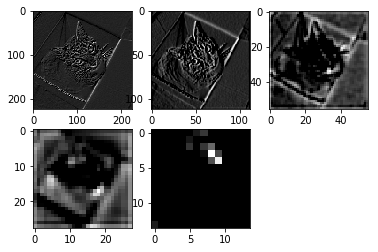

In [10]:
#plt.figure(figsize=(max_print, 1))
#plt.axis('off')
channel_index = 30
plt.subplot(231)
plt.imshow(conv1_1[0,:,:,channel_index], cmap='gray')
plt.subplot(232)
plt.imshow(conv2_1[0,:,:,channel_index], cmap='gray')
plt.subplot(233)
plt.imshow(conv3_2[0,:,:,channel_index], cmap='gray')
plt.subplot(234)
plt.imshow(conv4_3[0,:,:,channel_index], cmap='gray')
plt.subplot(235)
plt.imshow(conv5_3[0,:,:,channel_index], cmap='gray')
plt.show()